## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Read the dataframe

In [2]:
churnData = pd.read_csv('Customer-Churn.csv') 
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## check the datatype

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

## Convert the column 'TotalCharges' into numeric type using pd.to_numeric function.

In [4]:
churnData[['TotalCharges']] = churnData[['TotalCharges']].apply(pd.to_numeric, errors='coerce')

## check the NAN values and replace them

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churnData['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [7]:
# fill in with the mean

churnData = churnData.fillna(churnData.mean())

## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.  
- Split the data into a training set and a test set.  
- Fit a logistic regression model on the training data.  
- Check the accuracy on the test data.  

In [8]:
#split X and y
X = churnData.select_dtypes(np.number)
y = churnData['Churn']

X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [9]:
# using standard scaler
transformer = StandardScaler()
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X)

x_standardized = transformer.transform(X)
x_standardized


array([[-0.43991649, -1.27744458, -1.16032292, -0.99497138],
       [-0.43991649,  0.06632742, -0.25962894, -0.17387565],
       [-0.43991649, -1.23672422, -0.36266036, -0.96039939],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , -0.85518222],
       [ 2.27315869, -1.15528349,  0.32033821, -0.87277729],
       [-0.43991649,  1.36937906,  1.35896134,  2.01391739]])

## question : 

in the course material, it is said that we should do the train-test split before using standard scaler. Why do we do it before in this case? Thanks for your answer

In [10]:
xs_col = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
x_standardized=pd.DataFrame(x_standardized, columns = xs_col)
x_standardized


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.2, random_state=42)

In [13]:
def logistic_regression_model(X_train, X_test, y_train, y_test):

    # defining a function to apply the logistic regression model
    
    classification = LogisticRegression(random_state=42, max_iter=10000)
    classification.fit(X_train, y_train)
    
    # and to evaluate the model
    score = classification.score(X_test, y_test)
    print('The accuracy score is: ', score, '\n')
      
    predictions = classification.predict(X_test)
    confusion_matrix(y_test, predictions)  
   
    
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True NO', 'False NO',
               'False YES', 'True YES']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print (cf_matrix)

The accuracy score is:  0.8076650106458482 

[[959  77]
 [194 179]]


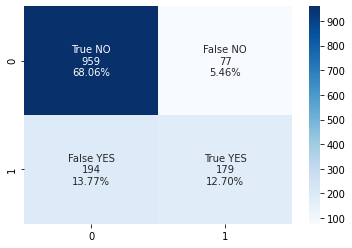

In [14]:
logistic_regression_model(X_train, X_test, y_train, y_test)

## Managing imbalance in the dataset

## Check for the imbalance.

In [15]:
# target variable
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

##  & Each time fit the model and see how the accuracy of the model is.

In [24]:
#concat X and y before resampling

df= pd.concat([x_standardized, y], axis=1)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,-0.439916,-1.277445,-1.160323,-0.994971,No
1,-0.439916,0.066327,-0.259629,-0.173876,No
2,-0.439916,-1.236724,-0.362660,-0.960399,Yes
3,-0.439916,0.514251,-0.746535,-0.195400,No
4,-0.439916,-1.236724,0.197365,-0.941193,Yes
...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281,No
7039,-0.439916,1.613701,1.277533,2.242808,No
7040,-0.439916,-0.870241,-1.168632,-0.855182,No
7041,2.273159,-1.155283,0.320338,-0.872777,Yes


In [19]:
#checking NAN after concat operation

df.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

### First Run  : 50/50 - upsampling only

In [26]:
# Manually


Yes = df[df['Churn'] == 'Yes'].sample(5174, replace=True)
No = df[df['Churn'] == 'No'].sample(5174)

upsampled = pd.concat([Yes,No]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
upsampled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
6351,-0.439916,0.717853,1.294151,1.230882,Yes
3962,2.273159,-1.033122,0.657683,-0.722546,Yes
2935,-0.439916,1.572981,0.709199,1.661310,No
1954,-0.439916,-1.277445,0.355236,-0.974838,Yes
4775,-0.439916,-0.340876,1.147913,0.065369,Yes
...,...,...,...,...,...
6039,2.273159,-0.218715,-0.939304,-0.552490,Yes
2294,-0.439916,-0.829521,1.393859,-0.454514,Yes
598,-0.439916,0.758574,0.850451,1.029322,No
4517,2.273159,-0.870241,1.156222,-0.508690,Yes


In [29]:
# split X and y
X1 = upsampled.drop('Churn', axis=1)
y1 = upsampled['Churn']

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

The accuracy score is:  0.7415458937198067 

[[770 282]
 [253 765]]


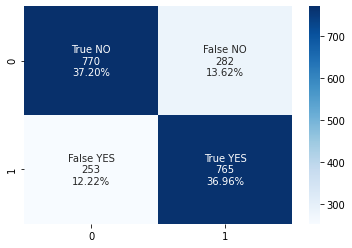

In [31]:
logistic_regression_model(X_train1, X_test1, y_train1, y_test1 )

Accuracy score is lower but the model predicts better the Yes. Still the number of False Yes is high.

### Run 2 : 50/50 - downsampling and upsampling

In [32]:
# Manually

Yes2 = df[df['Churn'] == 'Yes'].sample(3104, replace=True)
No2 = df[df['Churn'] == 'No'].sample(3104, replace=True)

upsampled2 = pd.concat([Yes2,No2]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
upsampled2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
1822,-0.439916,-0.055834,0.724155,0.182838,Yes
6029,-0.439916,-1.155283,1.001675,-0.848957,No
1621,-0.439916,0.107048,0.720831,0.329295,Yes
952,-0.439916,-0.422317,-0.321115,-0.454845,No
3517,-0.439916,1.532261,1.486920,2.318641,Yes
...,...,...,...,...,...
5359,2.273159,-0.910961,-1.166970,-0.879489,Yes
4162,-0.439916,1.613701,0.031186,1.012014,No
5288,-0.439916,-1.277445,0.494827,-0.972983,Yes
2373,-0.439916,1.369379,-0.510560,0.427646,No


In [33]:
# split X and y
X2 = upsampled2.drop('Churn', axis=1)
y2 = upsampled2['Churn']

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

The accuracy score is:  0.7632850241545893 

[[490 148]
 [146 458]]


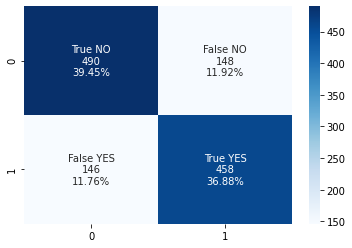

In [36]:
logistic_regression_model(X_train2, X_test2, y_train2, y_test2)

Run 2 does not significantly improve the model.

### RUN 3 : downsampling 60% of the majority class

In [44]:
# Manually

Yes3 = df[df['Churn'] == 'Yes'].sample(1869)
No3 = df[df['Churn'] == 'No'].sample(1869, replace=True)

upsampled3 = pd.concat([Yes3,No3]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
upsampled3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
5956,-0.439916,-0.055834,0.835495,0.231186,Yes
3192,-0.439916,1.043616,-1.515947,-0.550944,No
3458,-0.439916,-0.259435,0.798936,-0.003952,Yes
5313,-0.439916,0.962175,0.828848,1.178737,No
2390,-0.439916,-0.992402,-1.494344,-0.937484,No
...,...,...,...,...,...
4749,-0.439916,-1.114563,-0.517207,-0.912383,Yes
4747,-0.439916,0.107048,-1.467755,-0.675236,No
3975,2.273159,-0.503758,0.699228,-0.245404,Yes
3914,-0.439916,0.269929,-1.491021,-0.658833,No


In [45]:
# split X and y
X3 = upsampled3.drop('Churn', axis=1)
y3 = upsampled3['Churn']

In [46]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

The accuracy score is:  0.7379679144385026 

[[264  96]
 [100 288]]


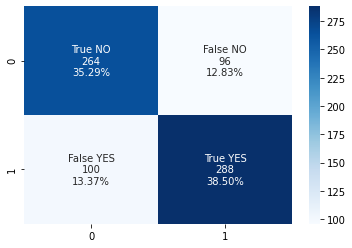

In [47]:
logistic_regression_model(X_train3, X_test3, y_train3, y_test3)

 Now the model predicts better the yes than the no. But the accuracy score is slightly lower which implies that the model predicts circa 26% of false answers.